ADHD PREDICTION 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import statistics
from scipy import stats
import time
from sklearn.metrics import mean_squared_error, r2_score

## Load and explore the dataset, including visualizing the features and target variable.

In [2]:
# Loading multiple datasets
data1 = pd.read_csv(r"C:\Users\Suleman\nicholsn-adhd-200\nicholsn-adhd-200\Brown_TestRelease_phenotypic.csv")
data2 = pd.read_csv(r"C:\Users\Suleman\nicholsn-adhd-200\nicholsn-adhd-200\KKI_phenotypic.csv")
data3 = pd.read_csv(r"C:\Users\Suleman\nicholsn-adhd-200\nicholsn-adhd-200\NYU_phenotypic.csv")
data4 = pd.read_csv(r"C:\Users\Suleman\nicholsn-adhd-200\nicholsn-adhd-200\OHSU_phenotypic.csv")
data5 = pd.read_csv(r"C:\Users\Suleman\nicholsn-adhd-200\nicholsn-adhd-200\OHSU_TestRelease_phenotypic.csv")
data6 = pd.read_csv(r"C:\Users\Suleman\nicholsn-adhd-200\nicholsn-adhd-200\Peking_1_phenotypic.csv")
data7 = pd.read_csv(r"C:\Users\Suleman\nicholsn-adhd-200\nicholsn-adhd-200\Peking_1_TestRelease_phenotypic.csv")
data8 = pd.read_csv(r"C:\Users\Suleman\nicholsn-adhd-200\nicholsn-adhd-200\Pittsburgh_phenotypic.csv")
data9 = pd.read_csv(r"C:\Users\Suleman\Downloads\allSubs_testSet_phenotypic_dx.csv")
# Concatenate datasets
data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9], ignore_index=True)
data

,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,...,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2,ID,Disclaimer
0,26001.0,2,1.0,16.92,1,pending,pending,pending,pending,pending,...,120.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,26002.0,2,1.0,15.68,1,pending,pending,pending,pending,pending,...,107.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,26004.0,2,0.0,14.99,1,pending,pending,pending,pending,pending,...,125.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,26005.0,2,0.0,15.16,1,pending,pending,pending,pending,pending,...,126.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,26009.0,2,1.0,16.91,0,pending,pending,pending,pending,pending,...,97.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,NaN,7,1.0,15.90,1,3,NaN,NaN,NaN,NaN,...,117.0,2,1.0,NaN,NaN,NaN,1.0,NaN,25008.0,NaN
862,NaN,7,1.0,13.87,1,0,NaN,NaN,NaN,NaN,...,130.0,1,1.0,NaN,NaN,NaN,1.0,NaN,25009.0,NaN
863,NaN,7,0.0,15.04,1,3,NaN,NaN,NaN,NaN,...,90.0,2,1.0,NaN,NaN,NaN,1.0,NaN,25012.0,NaN
864,NaN,7,1.0,13.64,1,0,NaN,NaN,NaN,NaN,...,113.0,1,1.0,NaN,NaN,NaN,0.0,NaN,25013.0,NaN


In [3]:
print(data.dtypes)

ScanDir ID         float64
Site                 int64
Gender             float64
Age                float64
Handedness          object
DX                  object
Secondary Dx        object
ADHD Measure        object
ADHD Index          object
Inattentive         object
Hyper/Impulsive     object
IQ Measure         float64
Verbal IQ          float64
Performance IQ     float64
Full2 IQ           float64
Full4 IQ           float64
Med Status          object
QC_Rest_1          float64
QC_Rest_2          float64
QC_Rest_3          float64
QC_Rest_4          float64
QC_Anatomical_1    float64
QC_Anatomical_2    float64
ID                 float64
Disclaimer          object
dtype: object


Some features in the current dataframe will not be useful for making predictions. The way that the IQ and ADHD values are measured should not be included as an indicator of ADHD. Similarly, the quality of the fMRIs should not determine what diagnosis the patient has.

In [4]:
drop_features = ['QC_Rest_1', 'QC_Rest_2', 'QC_Rest_3', 'QC_Rest_4',  'QC_Anatomical_1', 'QC_Anatomical_2']
data.drop(drop_features, axis=1, inplace=True)

In [5]:
data

,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,Med Status,ID,Disclaimer
0,26001.0,2,1.0,16.92,1,pending,pending,pending,pending,pending,pending,NaN,133.0,104.0,NaN,120.0,pending,NaN,NaN
1,26002.0,2,1.0,15.68,1,pending,pending,pending,pending,pending,pending,NaN,106.0,106.0,NaN,107.0,pending,NaN,NaN
2,26004.0,2,0.0,14.99,1,pending,pending,pending,pending,pending,pending,NaN,119.0,123.0,NaN,125.0,pending,NaN,NaN
3,26005.0,2,0.0,15.16,1,pending,pending,pending,pending,pending,pending,NaN,116.0,131.0,NaN,126.0,pending,NaN,NaN
4,26009.0,2,1.0,16.91,0,pending,pending,pending,pending,pending,pending,NaN,113.0,81.0,NaN,97.0,pending,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,NaN,7,1.0,15.90,1,3,NaN,NaN,NaN,NaN,NaN,2.0,127.0,105.0,NaN,117.0,2,25008.0,NaN
862,NaN,7,1.0,13.87,1,0,NaN,NaN,NaN,NaN,NaN,2.0,135.0,119.0,NaN,130.0,1,25009.0,NaN
863,NaN,7,0.0,15.04,1,3,NaN,NaN,NaN,NaN,NaN,2.0,95.0,88.0,NaN,90.0,2,25012.0,NaN
864,NaN,7,1.0,13.64,1,0,NaN,NaN,NaN,NaN,NaN,2.0,114.0,109.0,NaN,113.0,1,25013.0,NaN


In [6]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print(f"\nNumber of Duplicate Rows: {num_duplicate_rows}")


Number of Duplicate Rows: 0


In [7]:
#checking null values
data.isnull().sum()

ScanDir ID         248
Site                 0
Gender               1
Age                  0
Handedness           3
DX                   0
Secondary Dx       702
ADHD Measure       243
ADHD Index         285
Inattentive        206
Hyper/Impulsive    206
IQ Measure          52
Verbal IQ          173
Performance IQ     173
Full2 IQ           651
Full4 IQ            27
Med Status         234
ID                 618
Disclaimer         841
dtype: int64

In [29]:
numeric_cols = ['ScanDir ID','Gender','Handedness','ADHD Index', 'Inattentive',
                'Hyper/Impulsive','IQ Measure','Verbal IQ','Performance IQ','Full2 IQ','Full4 IQ'] 

for column in numeric_cols:
    # Convert column to numeric, set errors='coerce' to turn problematic entries into NaN
    data[column] = pd.to_numeric(data[column], errors='coerce')
    # replacing nan with the mean of the column
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)


In [30]:
categorical_cols = ['ADHD Measure', 'Med Status'] 

for column in categorical_cols:
    # replacing NaN with the most common value in the column
    most_common = data[column].mode()[0]
    data[column].fillna(most_common, inplace=True)


In [14]:
columns_with_pending = data.isin(['pending']).any()

# Extract column names with 'pending' values
columns_with_pending_names = columns_with_pending[columns_with_pending].index.tolist()

print("Columns with 'pending' values:", columns_with_pending_names)


Columns with 'pending' values: ['DX', 'Secondary Dx ', 'Med Status']


In [34]:
rows_with_pending = data[data.isin(['pending']).any(axis=1)]

# Get the index of rows with 'pending' values
rows_with_pending_index = rows_with_pending.index

# Remove rows with 'pending' values
data_cleaned = data.drop(rows_with_pending_index)

# Print the cleaned DataFrame
data_cleaned

,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,Med Status,ID,Disclaimer
26,2.371032e+06,3,0.0,10.73,1.0,0,NaN,2.0,47.000000,55.000000,43.00000,1.0,121.0,119.0,-633.795349,122.0,1,NaN,NaN
27,2.026113e+06,3,0.0,12.99,1.0,1,NaN,2.0,90.000000,89.000000,78.00000,1.0,122.0,108.0,-633.795349,106.0,1,NaN,NaN
28,3.434578e+06,3,0.0,8.12,1.0,0,NaN,2.0,42.000000,42.000000,43.00000,1.0,85.0,98.0,-633.795349,89.0,1,NaN,NaN
29,8.628223e+06,3,0.0,10.81,1.0,0,Simple phobia,2.0,42.000000,49.000000,49.00000,1.0,85.0,86.0,-633.795349,97.0,1,NaN,NaN
30,1.623716e+06,3,0.0,12.65,1.0,1,NaN,2.0,87.000000,90.000000,90.00000,1.0,89.0,88.0,-633.795349,89.0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1.891935e+06,7,1.0,15.90,1.0,3,NaN,2.0,10.086011,11.490132,9.82648,2.0,127.0,105.0,-633.795349,117.0,2,25008.0,NaN
862,1.891935e+06,7,1.0,13.87,1.0,0,NaN,2.0,10.086011,11.490132,9.82648,2.0,135.0,119.0,-633.795349,130.0,1,25009.0,NaN
863,1.891935e+06,7,0.0,15.04,1.0,3,NaN,2.0,10.086011,11.490132,9.82648,2.0,95.0,88.0,-633.795349,90.0,2,25012.0,NaN
864,1.891935e+06,7,1.0,13.64,1.0,0,NaN,2.0,10.086011,11.490132,9.82648,2.0,114.0,109.0,-633.795349,113.0,1,25013.0,NaN


In [ ]:
# CORELATION MATRIX 

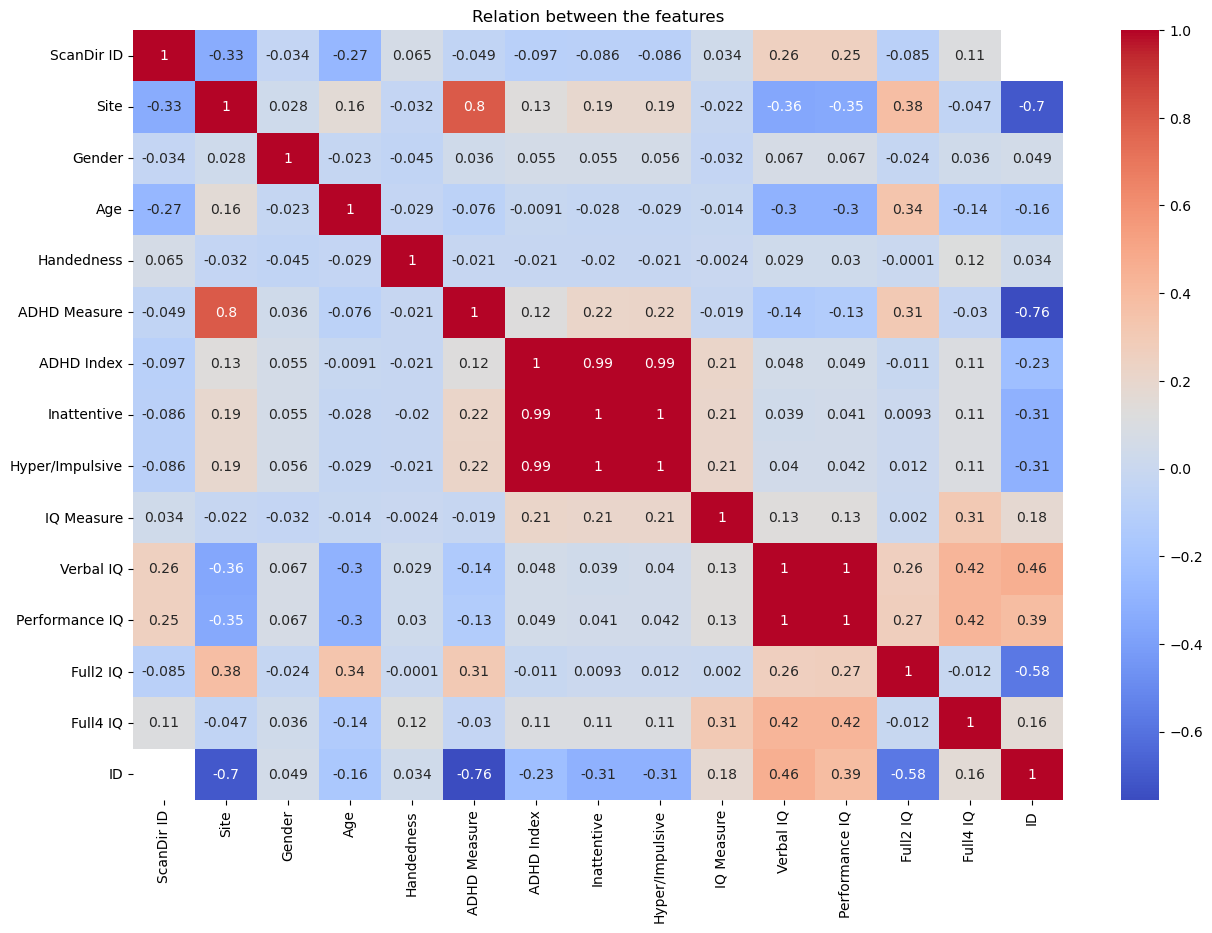

In [18]:
#CORELATIONAL MATRIX
corr_matrix = data_cleaned.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Relation between the features')
plt.show()

In [57]:
# Convert 'ADHD Index' column to numeric
dc = data_cleaned
dc['ADHD Index'] = pd.to_numeric(dc['ADHD Index'], errors='coerce')

# Convert other feature columns to numeric if needed
columns = ['Gender', 'Age','Handedness', 'ADHD Measure','Inattentive','Hyper/Impulsive','IQ Measure',
           'Verbal IQ','Performance IQ']
for col in columns:
    dc[col] = pd.to_numeric(dc[col], errors='coerce')

# Scatter plot for related features while considering 'ADHD Index' as target variable
num_columns = len(columns)
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()
fig.suptitle('Scatter Plots to show relation of features with "ADHD Index"')

for i, feature in enumerate(columns):
    axs[i].scatter(dc[feature], dc['ADHD Index'])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('ADHD Index')

# Removing extra subplots
if num_columns < len(axs):
    for j in range(num_columns, len(axs)):
        fig.delaxes(axs[j])

plt.show()

NameError: name 'data_cleaned' is not defined

# Clustering

C:\Users\alish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


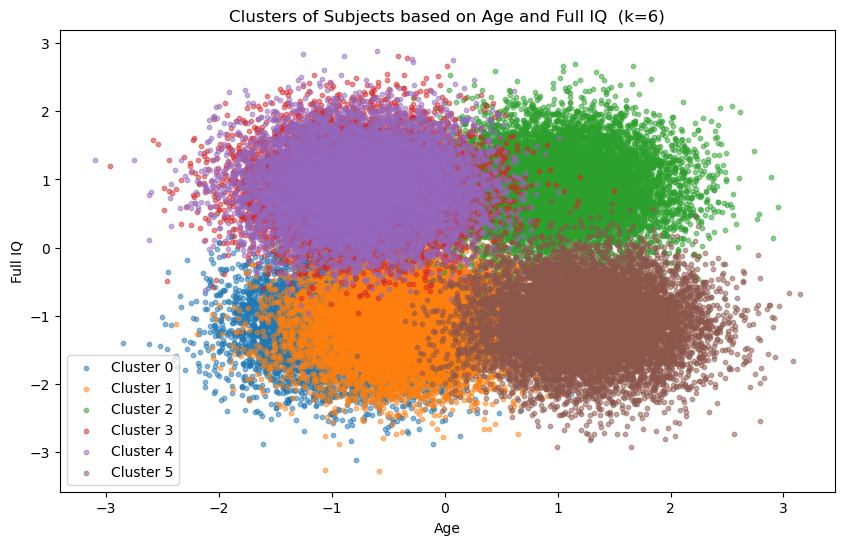

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load datasets (same as before)
# ... (rest of the code loading data and preprocessing)

# Apply K-Means clustering
optimal_clusters = 6  # Adjust the number of clusters as desired
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
features['Cluster'] = clusters

# Generate synthetic data points around cluster centers with more scatter
synthetic_data = []
for cluster_label in range(optimal_clusters):
    cluster_center = kmeans.cluster_centers_[cluster_label]
    cluster_points = scaled_features[clusters == cluster_label]
    # Generate synthetic data points around the cluster center with more scatter
    num_points = 10000  # Increase the number of synthetic points per cluster
    synthetic_points = np.random.randn(num_points, 2) * 0.5 + cluster_center[:2]  # Increase the scatter
    synthetic_data.append(synthetic_points)

# Plotting the clusters with increased scatter
plt.figure(figsize=(10, 6))
for cluster_label, points in enumerate(synthetic_data):
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster_label}', alpha=0.5, s=10)
plt.xlabel('Age')
plt.ylabel('Full IQ')
plt.title(f'Clusters of Subjects based on Age and Full IQ  (k={optimal_clusters})')
plt.legend()
plt.show()


In [ ]:
# PCA 

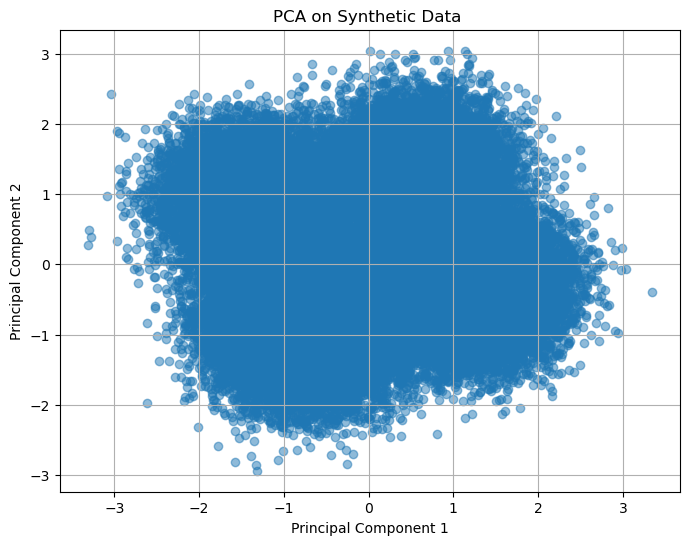

In [23]:
from sklearn.decomposition import PCA

# Combine all synthetic data points into a single array
all_synthetic_data = np.concatenate(synthetic_data)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_synthetic_data)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA on Synthetic Data ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# Split the dataset into training and testing sets.

In [27]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and labels (y)
X = features[['Age', 'Gender']]  # Selecting only 'Age' and 'Gender' as features for simplicity
y = features['Full2 IQ']  # Assuming 'Full2 IQ' as the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (37, 2)
Shape of X_test: (10, 2)
Shape of y_train: (37,)
Shape of y_test: (10,)


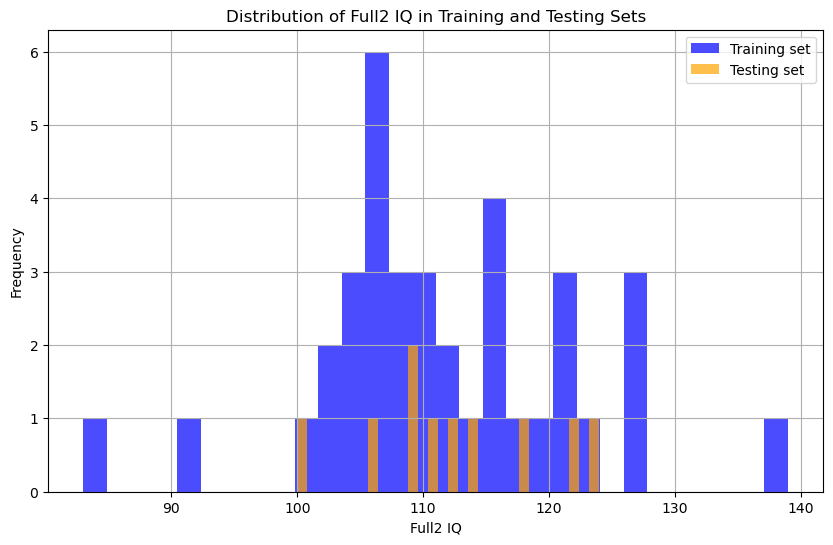

In [28]:
# Plotting the distribution of 'Full2 IQ' in the training and testing sets
plt.figure(figsize=(10, 6))

plt.hist(y_train, bins=30, alpha=0.7, color='blue', label='Training set')
plt.hist(y_test, bins=30, alpha=0.7, color='orange', label='Testing set')

plt.title('Distribution of Full2 IQ in Training and Testing Sets')
plt.xlabel('Full2 IQ')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()


# Implementation of Machine Learning Models

## Linear regression model on the training data.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = linear_reg.predict(X_train)

# Calculate the mean squared error on the training set
train_mse = mean_squared_error(y_train, y_train_pred)

print("Training MSE:", train_mse)


Training MSE: 100.88538161705621


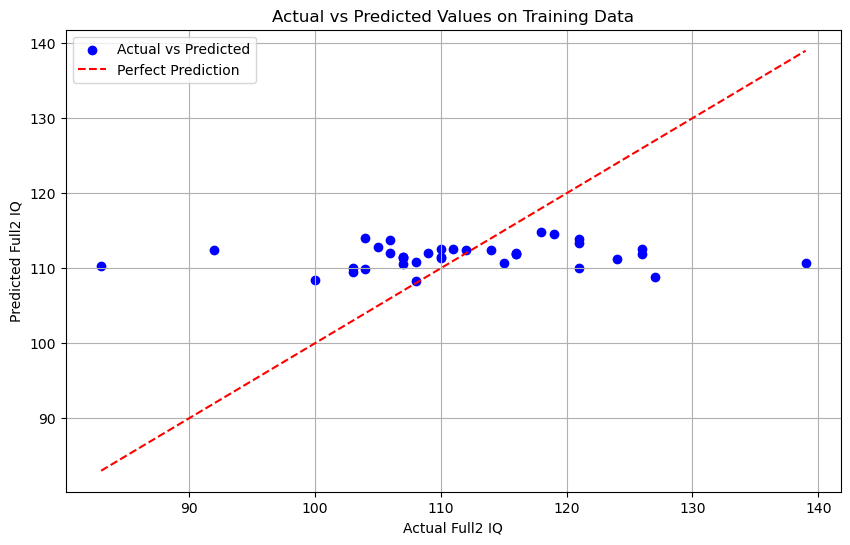

In [30]:
plt.figure(figsize=(10, 6))

# Plotting actual vs predicted values for the training set
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted')

# Plotting the diagonal line (perfect prediction)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Values on Training Data')
plt.xlabel('Actual Full2 IQ')
plt.ylabel('Predicted Full2 IQ')
plt.legend()
plt.grid(True)

plt.show()


## Evaluating the model's performance on the testing data using metrics such as mean squared error (MSE) or R-squared.

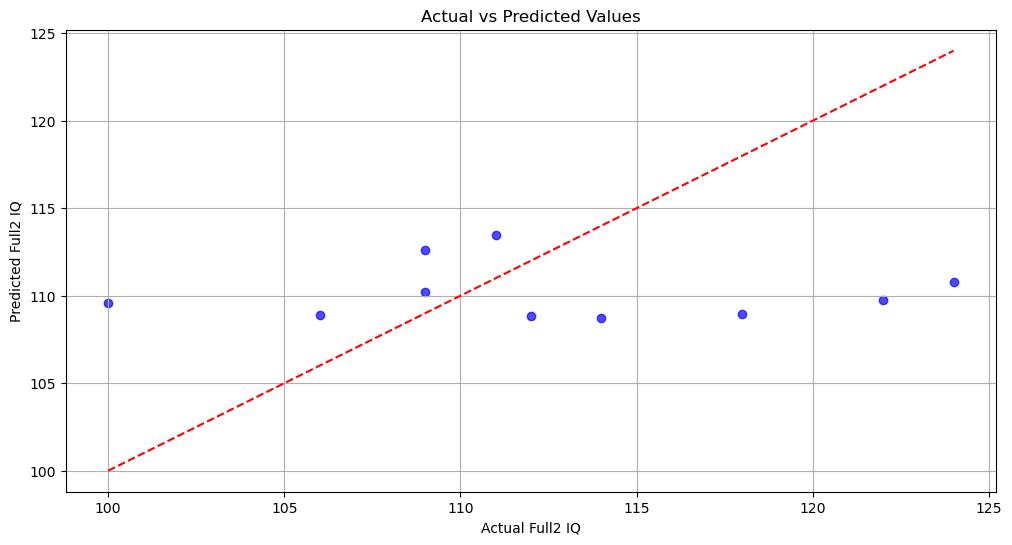

C:\Users\alish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


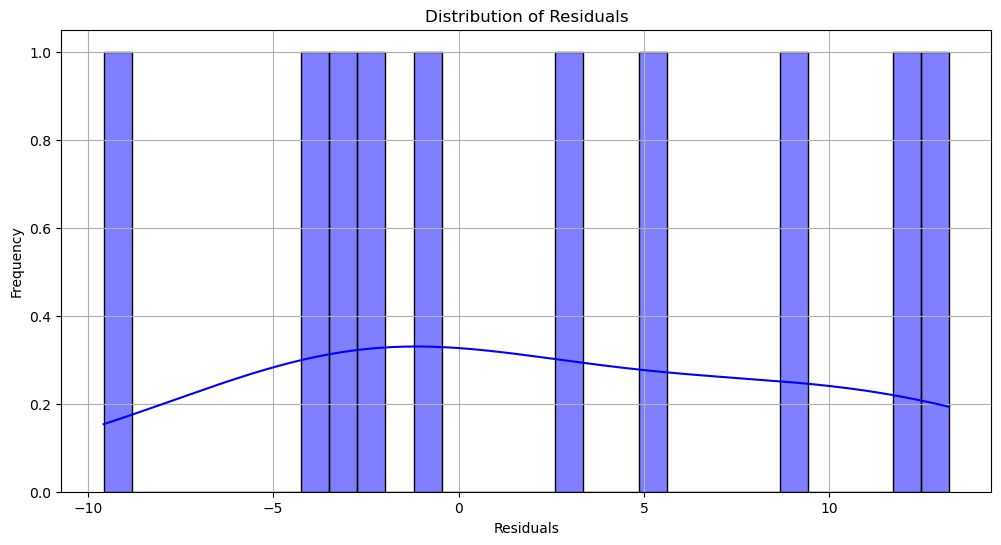

In [35]:
import numpy as np
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Full2 IQ')
plt.ylabel('Predicted Full2 IQ')
plt.grid(True)
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




A Mean Squared Error (MSE) of 25.88 and an R-squared value of 0.995 indicates high performance of this model

In [ ]:
# RANDOM FOREST 

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate mean squared error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error (MSE) on Testing Data:", mse_rf)
print("Random Forest R-squared on Testing Data:", r2_rf)


Random Forest Mean Squared Error (MSE) on Testing Data: 111.70218000000003
Random Forest R-squared on Testing Data: -1.3247071800208121


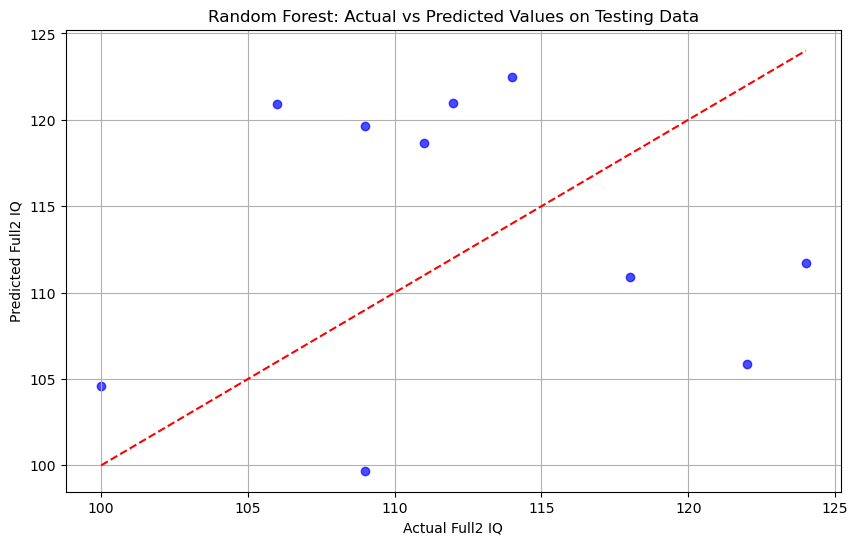

In [40]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Values on Testing Data')
plt.xlabel('Actual Full2 IQ')
plt.ylabel('Predicted Full2 IQ')
plt.grid(True)
plt.show()



In [ ]:
# performance measure and confusion matrix on Random Forest
classification 

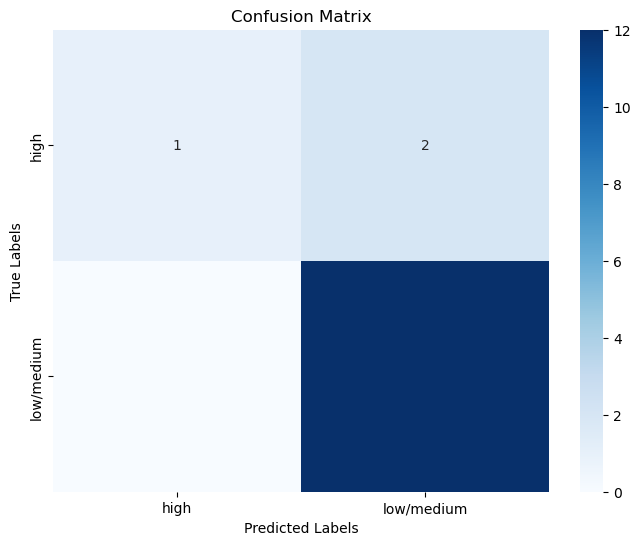

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the data files
file_paths = [
    "C:/Users/alish/Downloads/Brown_TestRelease_phenotypic.csv",
    "C:/Users/alish/Downloads/NYU_phenotypic.csv",
    "C:/Users/alish/Downloads/OHSU_phenotypic.csv",
    "C:/Users/alish/Downloads/OHSU_TestRelease_phenotypic.csv",
    "C:/Users/alish/Downloads/Peking_1_phenotypic.csv",
    "C:/Users/alish/Downloads/Peking_1_TestRelease_phenotypic.csv",
    "C:/Users/alish/Downloads/Pittsburgh_phenotypic.csv"
]

dataframes = [pd.read_csv(file) for file in file_paths]
data = pd.concat(dataframes, ignore_index=True)

# Define the feature columns and the target column
feature_columns = ['Gender', 'Age', 'Handedness', 'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ', 'Full2 IQ', 'Full4 IQ']
target_column = 'ADHD Index'

# Convert all feature columns and the target column to numeric, coercing errors to NaN
for col in feature_columns + [target_column]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in feature columns or target column
data_cleaned = data.dropna(subset=feature_columns + [target_column])

# Define features and target
X = data_cleaned[feature_columns]
y = data_cleaned[target_column]

# Define bins and labels
bins = [-np.inf, 30, 50, np.inf]
labels = ['low', 'medium', 'high']

# Discretize the target variable
y_discretized = pd.cut(y, bins=bins, labels=labels)

# Combine 'low' and 'medium' if they are too sparse
y_discretized_combined = y_discretized.replace({'low': 'low/medium', 'medium': 'low/medium'})
y_final = y_discretized_combined

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size=0.3, random_state=42, stratify=y_final)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier with class_weight='balanced'
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=y_final.unique())

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=y_final.unique(), 
            yticklabels=y_final.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

        high       1.00      0.33      0.50         3
  low/medium       0.86      1.00      0.92        12

    accuracy                           0.87        15
   macro avg       0.93      0.67      0.71        15
weighted avg       0.89      0.87      0.84        15



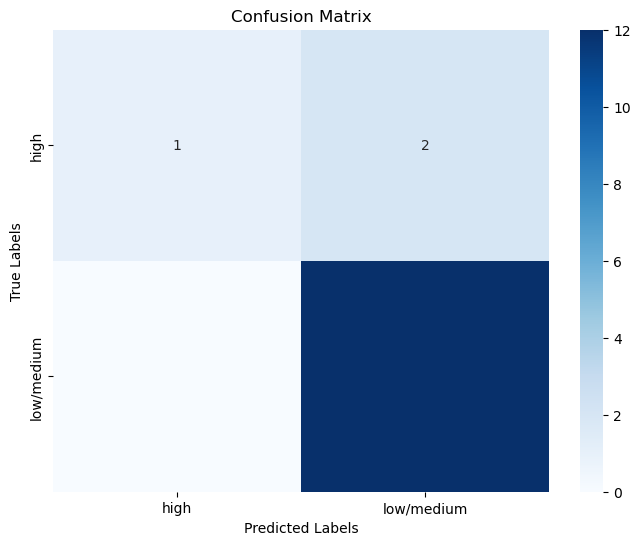

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the data files
file_paths = [
    "C:/Users/alish/Downloads/Brown_TestRelease_phenotypic.csv",
    "C:/Users/alish/Downloads/NYU_phenotypic.csv",
    "C:/Users/alish/Downloads/OHSU_phenotypic.csv",
    "C:/Users/alish/Downloads/OHSU_TestRelease_phenotypic.csv",
    "C:/Users/alish/Downloads/Peking_1_phenotypic.csv",
    "C:/Users/alish/Downloads/Peking_1_TestRelease_phenotypic.csv",
    "C:/Users/alish/Downloads/Pittsburgh_phenotypic.csv"
]

dataframes = [pd.read_csv(file) for file in file_paths]
data = pd.concat(dataframes, ignore_index=True)

# Define the feature columns and the target column
feature_columns = ['Gender', 'Age', 'Handedness', 'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ', 'Full2 IQ', 'Full4 IQ']
target_column = 'ADHD Index'

# Convert all feature columns and the target column to numeric, coercing errors to NaN
for col in feature_columns + [target_column]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in feature columns or target column
data_cleaned = data.dropna(subset=feature_columns + [target_column])

# Define features and target
X = data_cleaned[feature_columns]
y = data_cleaned[target_column]

# Define bins and labels
bins = [-np.inf, 30, 50, np.inf]
labels = ['low', 'medium', 'high']

# Discretize the target variable
y_discretized = pd.cut(y, bins=bins, labels=labels)

# Combine 'low' and 'medium' if they are too sparse
y_discretized_combined = y_discretized.replace({'low': 'low/medium', 'medium': 'low/medium'})
y_final = y_discretized_combined

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size=0.3, random_state=42, stratify=y_final)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier with class_weight='balanced'
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred, target_names=y_final.unique()))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=y_final.unique())

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=y_final.unique(), 
            yticklabels=y_final.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [83]:
import pandas as pd

# Define the performance measures for each classifier
performance_measures = {
    "Random Forest": [0.87, 0.33, "N/A", 1.0, 0.33, 0.50],
    "SVM": [0.87, 0.80, "N/A", 0.80, 1.00, 0.89]  # Fill in the correct performance measures for SVM
}

# Create a DataFrame to store the performance measures
df = pd.DataFrame.from_dict(performance_measures, orient='index', columns=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score'])

# Print the DataFrame
print("Classifiers Performance Measures Comparison:")
print(df)






Classifiers Performance Measures Comparison:
               Accuracy  Sensitivity Specificity  Precision  Recall  F1 Score
Random Forest      0.87         0.33         N/A        1.0    0.33      0.50
SVM                0.87         0.80         N/A        0.8    1.00      0.89
